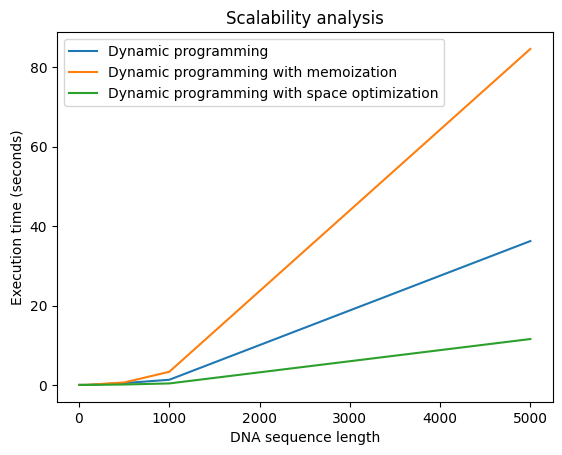

In [4]:
import time
import random
import matplotlib.pyplot as plt

# Import your functions here
from dynamic_program import min_edit_distance_dp
from recursive import med_recursive
from dynamic_program_memo import min_edit_distance_memo
from divide_n_conquer import min_edit_distance_dnc
from dynamic_program_space import min_edit_distance_space_optimized

# set recursion limit to 10^6
import sys
sys.setrecursionlimit(10**6)

def generate_random_dna(length):
    return ''.join(random.choice('ACGT') for _ in range(length))

lengths = [5, 10,50, 100, 500, 1000,5000]
# all dynamic programming functions
functions = [min_edit_distance_dp, min_edit_distance_memo, min_edit_distance_space_optimized]
labels = ['Dynamic programming', 'Dynamic programming with memoization', 'Dynamic programming with space optimization']

for function, label in zip(functions, labels):
    times = []
    for length in lengths:
        dna1 = generate_random_dna(length)
        dna2 = generate_random_dna(length)

        start_time = time.time()
        function(dna1, dna2)
        end_time = time.time()

        elapsed_time = end_time - start_time
        times.append(elapsed_time)

    plt.plot(lengths, times, label=label)

plt.xlabel('DNA sequence length')
plt.ylabel('Execution time (seconds)')
plt.title('Scalability analysis')
plt.legend()
plt.show()

In [ ]:
%pip install matplotlib